In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read CSV data into Pandas dataframe
csv_path = Path("resources/crypto_data.csv")
df = pd.read_csv(csv_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
# "Discard all cryptocurrencies that are not being traded. In other words, 
# filter for currencies that are currently being traded. Once you have done 
# this, drop the IsTrading column from the dataframe."

traded_df = df[df["IsTrading"] != False].drop("IsTrading", axis=1)
traded_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Remove all rows that have at least one null value.
traded_df = traded_df.dropna()
traded_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# "Filter for cryptocurrencies that have been mined. 
# That is, the total coins mined should be greater than zero."

is_mined = traded_df[traded_df["TotalCoinsMined"] != 0]
is_mined

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# "In order for your dataset to be comprehensible to a machine learning 
# algorithm, its data should be numeric. Since the coin names do not contribute 
# to the analysis of the data, delete the CoinName from the original dataframe."
no_name = is_mined.drop(["Unnamed: 0", "CoinName"], axis=1)
no_name

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
# "Your next step in data preparation is to convert the remaining features with 
# text values, Algorithm and ProofType, into numerical data. To accomplish this 
# task, use Pandas to create dummy variables. Examine the number of rows and 
# columns of your dataset now. How did they change?"

dummies_df = pd.get_dummies(no_name, columns=["Algorithm", "ProofType"])
dummies_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# "Standardize your dataset so that columns that contain larger values do not 
# unduly influence the outcome."

coins_scaled = StandardScaler().fit_transform(dummies_df)
coins_scaled

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

In [10]:
# "... For this project, preserve 90% of the explained variance in 
# dimensionality reduction. How did the number of the features change?"

# Fit scaled data to PCA model with 90% of explained variance preserved
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(coins_scaled)

# Transform to DataFrame (from 100 features to 75)
pca_df = pd.DataFrame(crypto_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.333759,1.010335,-0.645813,0.009061,8.608154e-14,-5.998701e-14,4.335422e-15,-4.956531e-14,0.000677,-1.313000,...,-9.233498e-17,6.029390e-15,-8.049539e-16,1.542018e-15,-3.295176e-15,-3.421244e-15,4.018015e-15,3.058858e-15,-4.498040e-16,-4.033870e-15
1,-0.317078,1.010467,-0.646245,0.009004,8.624402e-14,-5.990411e-14,4.542497e-15,-4.946149e-14,0.000074,-1.315755,...,-4.639052e-16,5.211227e-15,-1.934931e-15,1.418468e-15,-3.624669e-15,-4.604438e-15,3.893422e-15,3.199849e-15,3.066629e-16,-3.781246e-15
2,2.308741,1.636182,-0.741287,0.027146,1.126192e-13,-8.193948e-14,1.484386e-14,-7.345521e-14,-0.049574,-1.540532,...,-1.245172e-14,-1.004949e-14,3.368316e-14,-4.975725e-14,1.814415e-13,7.182177e-14,-3.736978e-14,3.673319e-14,-8.836021e-14,1.013590e-13
3,-0.144347,-1.318206,0.216681,-0.007076,-2.914273e-14,2.137876e-14,-3.305963e-15,2.085920e-14,-0.003528,0.282703,...,1.039057e-14,-3.115300e-15,1.052117e-14,-9.466581e-15,2.847534e-14,-1.391329e-14,6.772451e-15,8.136327e-15,4.289523e-15,1.411197e-14
4,-0.151002,-2.029159,0.440925,-0.010285,-6.067920e-14,4.244994e-14,-6.528066e-15,3.661219e-14,0.024224,0.520040,...,1.163980e-14,-3.905848e-14,-6.204364e-14,-4.587829e-14,7.654093e-14,-1.237257e-13,1.502375e-13,-6.172496e-14,1.111706e-13,-1.251848e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2.473406,0.829905,-0.056470,-0.040370,5.940862e-15,-1.284011e-14,2.865187e-14,-3.136529e-14,-0.857764,2.038548,...,1.122109e-14,-4.175916e-15,7.281168e-15,-8.980744e-15,3.301842e-14,-1.840238e-14,8.982624e-15,9.006700e-15,6.687894e-15,1.190228e-14
529,-0.331802,1.010217,-0.645833,0.009074,8.618272e-14,-5.999718e-14,4.520564e-15,-4.977619e-14,0.000650,-1.313369,...,-1.112750e-15,5.953356e-15,-7.209100e-16,1.150239e-15,-3.298570e-15,-3.796861e-15,4.211956e-15,2.963146e-15,-1.117692e-16,-4.296743e-15
530,0.325544,-2.304843,0.473021,-0.008294,-6.026577e-14,4.323640e-14,-5.865830e-15,3.799609e-14,0.013026,0.161413,...,7.421476e-16,-2.110640e-15,-3.091647e-14,1.657960e-14,3.799016e-14,-9.381888e-14,5.196975e-14,-2.277741e-14,5.688062e-14,-3.398214e-14
531,-0.148616,-2.042011,0.459154,-0.010550,-6.442013e-14,4.271858e-14,-3.487068e-15,4.105598e-14,0.025231,0.545010,...,-3.843239e-15,-5.385745e-16,4.706907e-15,-1.040777e-15,-2.783616e-15,3.662101e-15,-2.988458e-15,7.681174e-16,-5.372556e-15,-2.213588e-15


In [11]:
# t-SNE model, view output
tsne = TSNE().fit_transform(pca_df)
tsne_df = pd.DataFrame(tsne)

tsne_df

c:\Users\Charl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Charl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,0,1
0,-19.618202,8.628286
1,-13.959991,4.474303
2,-22.794239,15.759355
3,2.406403,33.563046
4,20.220701,-3.712460
...,...,...
528,3.428883,30.618633
529,-17.230051,3.178589
530,15.029043,13.622185
531,21.878382,3.817465


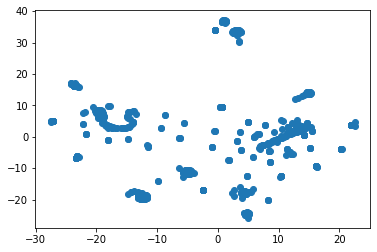

In [12]:
# Visualize clusters of t-SNE

plt.scatter(tsne_df[0], tsne_df[1])
plt.show()

c:\Users\Charl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


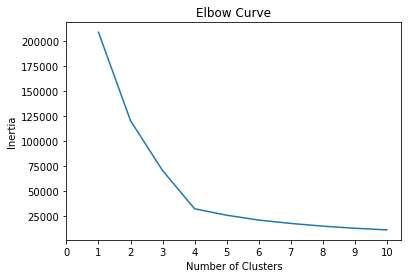

In [13]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=11)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(list(range(11)))
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [14]:
# Group with k=4 from elbow curve
model = KMeans(n_clusters=4, random_state=11)
model.fit(tsne_df)
predictions = model.predict(tsne_df)
tsne_df["class"] = model.labels_
tsne_df

,0,1,class
0,-19.618202,8.628286,1
1,-13.959991,4.474303,1
2,-22.794239,15.759355,1
3,2.406403,33.563046,2
4,20.220701,-3.712460,0
...,...,...,...
528,3.428883,30.618633,2
529,-17.230051,3.178589,1
530,15.029043,13.622185,0
531,21.878382,3.817465,0


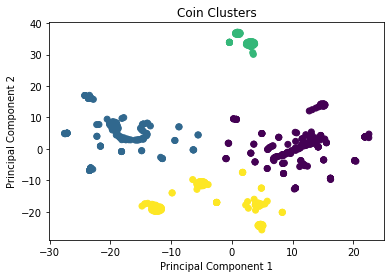

In [15]:
# Visualize clusters
plt.scatter(tsne_df[0], tsne_df[1], c=tsne_df["class"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Coin Clusters")
plt.show()

## Recommendation

Based on the most important features as determined by the PCA and t-SNE models, it looks as though these cryptocurrencies that are currently actively mined can be grouped into approximately 4 clusters.